In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

## Mouse aligned

In [2]:
if not os.path.exists("ALIGNED_Mus_musculus_Thymus"):
    os.makedirs("ALIGNED_Mus_musculus_Thymus")
quake_10x_thymus = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Thymus/data.h5").normalize()
quake_smart_seq2_thymus = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Thymus/data.h5").normalize()
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    quake_10x_thymus=quake_10x_thymus,
    quake_smart_seq2_thymus=quake_smart_seq2_thymus
), merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/weil/software/conda/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [3]:
mouse.obs.head()

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P7_11_AAACCTGAGACAGGCT,immature T cell,CL:0002420,immature T cell,NaN,4.0,Quake_10x_Thymus,3-F-56,DN4-DP in transition_Cd69_positive thymocytes,F,Thymus,Mus musculus,10X_P7_11,10x,
10X_P7_11_AAACCTGAGAGTCTGG,immature T cell,CL:0002420,immature T cell,NaN,1.0,Quake_10x_Thymus,3-F-56,DN4-DP transition_Cd69_negative_rapidly dividi...,F,Thymus,Mus musculus,10X_P7_11,10x,
10X_P7_11_AAACCTGCAGGAATGC,immature T cell,CL:0002420,immature T cell,NaN,4.0,Quake_10x_Thymus,3-F-56,DN4-DP in transition_Cd69_positive thymocytes,F,Thymus,Mus musculus,10X_P7_11,10x,
10X_P7_11_AAACCTGGTACCGTAT,immature T cell,CL:0002420,immature T cell,NaN,0.0,Quake_10x_Thymus,3-F-56,DN4-DP in transition Cd69_negative thymocytes,F,Thymus,Mus musculus,10X_P7_11,10x,
10X_P7_11_AAACGGGGTCAAACTC,professional antigen presenting cell,CL:0000145,professional antigen presenting cell,NaN,8.0,Quake_10x_Thymus,3-F-56,antigen presenting cells,F,Thymus,Mus musculus,10X_P7_11,10x,


In [4]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name"]
)  # Many batch effects are being aligned, decrease regularization strength accordingly
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Thymus/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=2.602, val=2.675, time elapsed=1.4s Regular save...
[DIRECTi epoch 1] train=2.597, val=2.669, time elapsed=0.3s
[DIRECTi epoch 2] train=2.589, val=2.659, time elapsed=0.3s
[DIRECTi epoch 3] train=2.577, val=2.646, time elapsed=0.3s
[DIRECTi epoch 4] train=2.562, val=2.624, time elapsed=0.3s
[DIRECTi epoch 5] train=2.527, val=2.571, time elapsed=0.3s
[DIRECTi epoch 6] train=2.373, val=2.452, time elapsed=0.3s
[DIRECTi epoch 7] train=1.841, val=1.377, time elapsed=0.3s
[DIRECTi epoch 8] train=1.207, val=2.851, time elapsed=0.3s
[DIRECTi epoch 9] train=1.091, val=2.705, time elapsed=0.3s
[DIRECTi epoch 10] train=1.085, val=1.744, time elapsed=0.3s Regular save...
[DIRECTi epoch 11] train=1.084, val=1.514, time elapsed=0.3s
[DIRECTi epoch 12] train=1.069, val=1.387, time elapsed=0.3s
[DIRECTi epoch 13] train=1.037, val=1.330, time elapsed=0.3s
[DIRECTi epoch 14] train=1.027, val=1.363, time elapsed=0.3s
[DIRECTi epoch 15] train=1.019, val=1.278, time elapsed=0.3s
[D

[  Info   ] Computing tSNE...


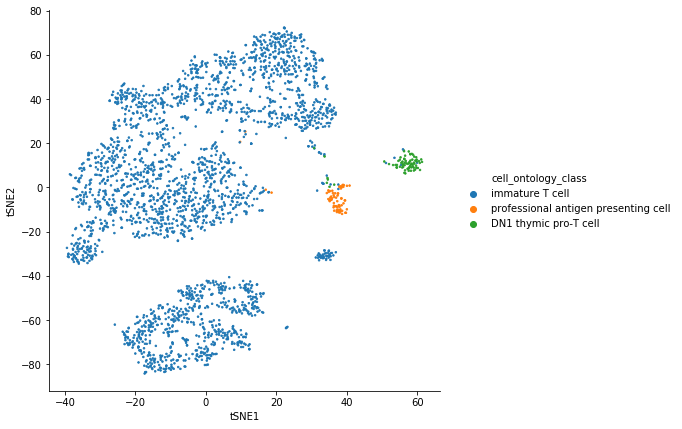

In [5]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Thymus/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


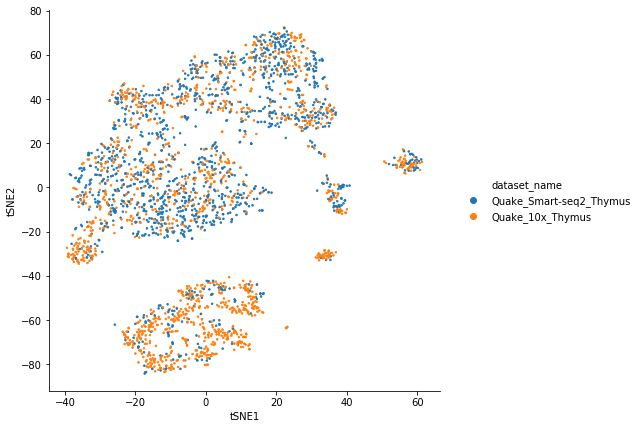

In [6]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Thymus/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


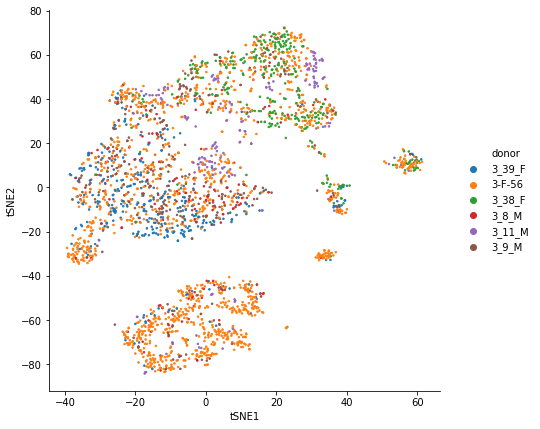

In [7]:
plot = mouse.visualize_latent("donor")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Thymus/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


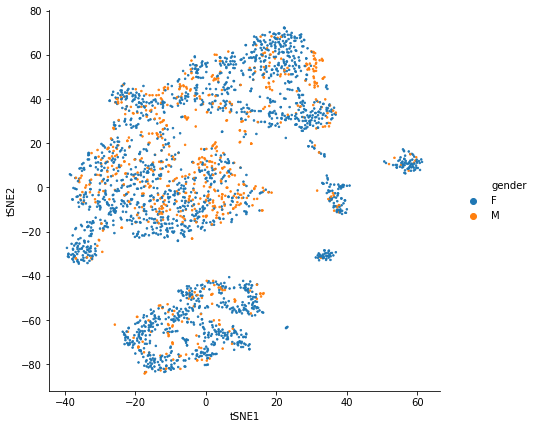

In [8]:
plot = mouse.visualize_latent("gender")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Thymus/gender.pdf", bbox_inches="tight")

In [9]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Thymus/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Thymus")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Thymus/model_1/checkpoint-185
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Thymus/model_2/checkpoint-197
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Thymus/model_3/checkpoint-100


In [10]:
with open("ALIGNED_Mus_musculus_Thymus/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Thymus/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [11]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Thymus")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9557
Accuracy = 0.9959
